<a href="https://colab.research.google.com/github/taraudani/EDA-FORK/blob/main/gss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [2]:
import pandas as pd
#
var_list = ['educ', 'paeduc', 'maeduc','income', 'incom16', 'rincome'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

**Variables Chosen:**

I chose the variables 'educ' (the respondents highest level of education), 'paeduc' (the respondent's father's highest level of education), 'maeduc' (the respondent's mother's highest level of education), 'income' (total family income), 'incom16' (the respondent's income at age 16), and 'rincome' (the respondent's income). I chose these variables because I was curious what the association, if any, between education level and income is. I think there may be some interesting correlations between what the parent's education level is and the respondent's education level, and I am curious how this leads into income level. Additionally, I am curious to see how the respondent's income level relates to their family income level at 16, and how this may be affected by their level of education.

In [3]:
#dropping all na values at the start
gss = pd.read_csv('selected_gss_data.csv').dropna()

In [4]:
#numeric variables, each number represents a year of schooling from no formal schooling to 8+ years of college
gss['educ'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [5]:
#numeric variables, each number represents a year of schooling from no formal schooling to 8+ years of college
gss['paeduc'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [6]:
#numeric variables, each number represents a year of schooling from no formal schooling to 8+ years of college
gss['maeduc'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [8]:
#categorical variable strings expressed as a range of family income level, only goes up to $25,000+ so may not be as good of a range to apply with today's inflation
import numpy as np
income = gss['income']
sorted_order = [
    'under $1,000', '$1,000 to $2,999', '$3,000 to $3,999', '$4,000 to $4,999',
    '$5,000 to $5,999', '$6,000 to $6,999', '$7,000 to $7,999', '$8,000 to $9,999',
    '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 or more'
]

#creates a dictionary that maps each income range to its rank/order to sort string values
order_dict = {value: index for index, value in enumerate(sorted_order)}

#sorts the income based on the custom order
sorted_income = sorted(income, key=lambda x: order_dict.get(x, np.nan))

In [9]:
#categorical variable strings expressed on a range of far below average to far above average
incom16 = gss['incom16']
sorted_order1 = [
    'far below average', 'below average', 'average', 'above average', 'far above average'
]

#creates a dictionary that maps each income range to its rank/order to sort string values
order_dict = {value: index for index, value in enumerate(sorted_order1)}

#sorts the income at 16 based on the custom order
sorted_incom16 = sorted(incom16, key=lambda x: order_dict.get(x, np.nan))

In [10]:
#categorical variable strings expressed as a range of individual income level, only goes up to $25,000+ so may not be as good of a range to apply with today's inflation
rincome = gss['rincome']
sorted_order2 = [
    'under $1,000', '$1,000 to $2,999', '$3,000 to $3,999', '$4,000 to $4,999',
    '$5,000 to $5,999', '$6,000 to $6,999', '$7,000 to $7,999', '$8,000 to $9,999',
    '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 or more'
]

#creates a dictionary that maps each income range to its rank/order to sort string values
order_dict = {value: index for index, value in enumerate(sorted_order2)}

#sorts the individual income based on the custom order
sorted_rincome = sorted(rincome, key=lambda x: order_dict.get(x, np.nan))

(0.0, 12000.0)

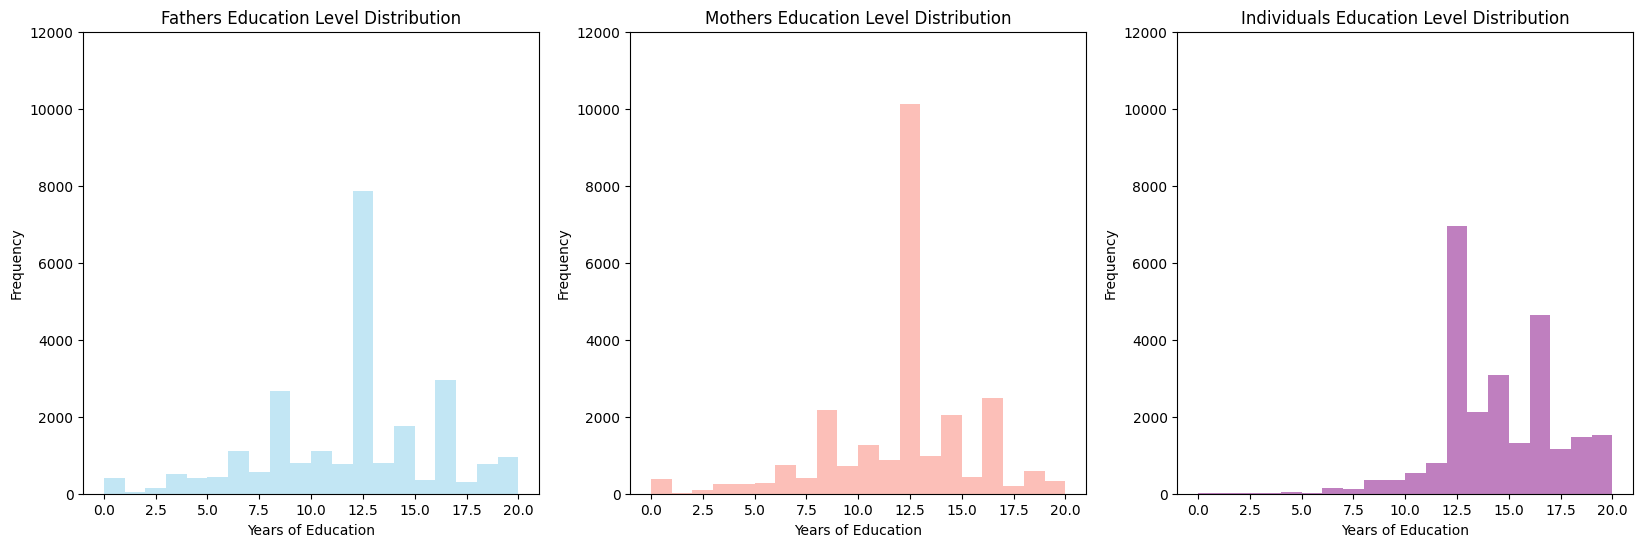

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#creating a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

#creating a histogram for each father, mother, or individual education level and its distribution
ax[0].hist(gss['paeduc'], bins=20, alpha=0.5, color='skyblue')
ax[0].set_title('Fathers Education Level Distribution')
ax[0].set_xlabel('Years of Education')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0, 12000) #standardizing y-axis range

ax[1].hist(gss['maeduc'], bins=20, alpha=0.5, color='salmon')
ax[1].set_title('Mothers Education Level Distribution')
ax[1].set_xlabel('Years of Education')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, 12000)

ax[2].hist(gss['educ'], bins=20, alpha=0.5, color='purple')
ax[2].set_title('Individuals Education Level Distribution')
ax[2].set_xlabel('Years of Education')
ax[2].set_ylabel('Frequency')
ax[2].set_ylim(0, 12000)

(11.5, 15.0)

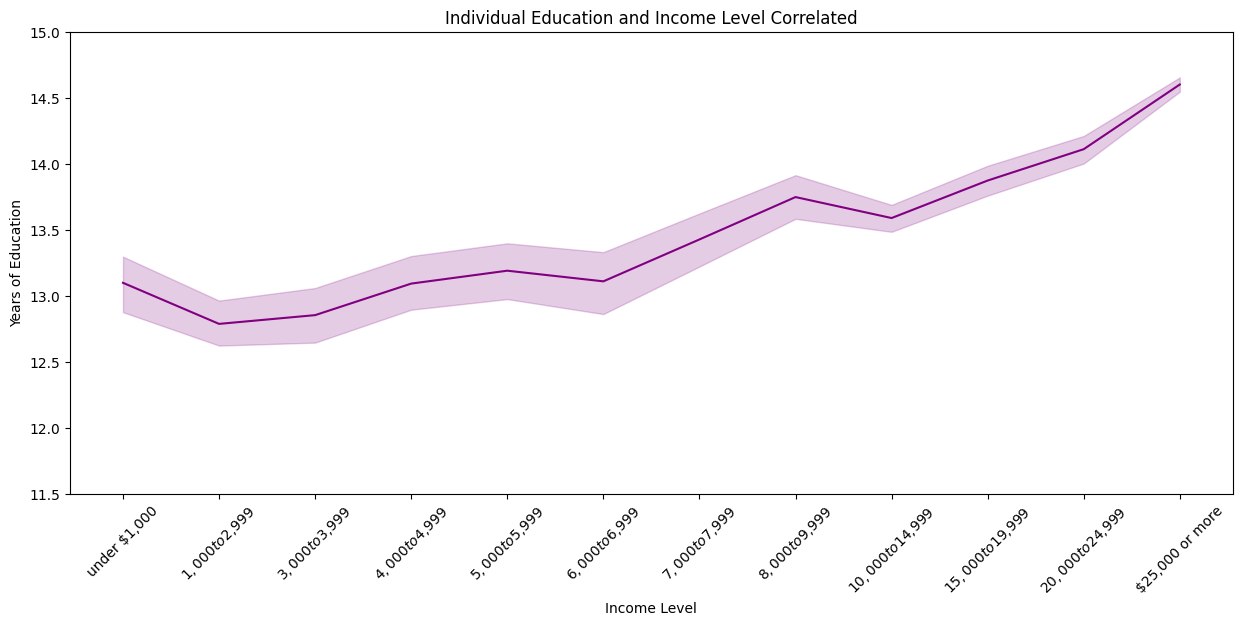

In [12]:
#creating a lineplot to show correlation between individual education level and income level
plt.figure(figsize=(15, 6))
sns.lineplot(data=gss, x=sorted_rincome, y='educ', color = 'purple')
plt.xticks(rotation=45)
plt.title('Individual Education and Income Level Correlated')
plt.xlabel('Income Level')
plt.ylabel('Years of Education')
plt.ylim(11.5,15)

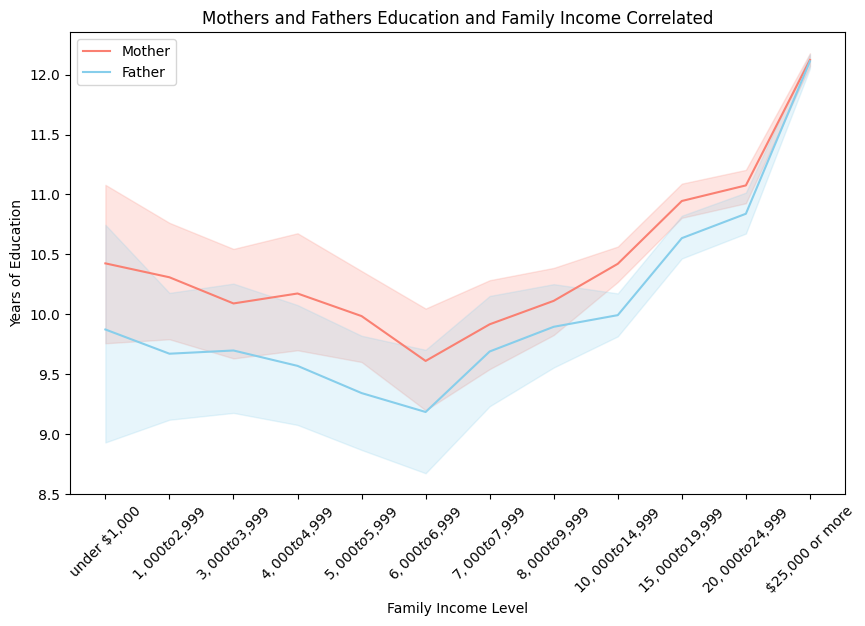

In [13]:
#plotting both mother and fathers education and family income
plt.figure(figsize=(10,6))
sns.lineplot(data=gss, x=sorted_income, y='maeduc', color = 'salmon', label='Mother')
sns.lineplot(data=gss, x=sorted_income, y='paeduc', color = 'skyblue', label='Father')
plt.xticks(rotation=45)
plt.title('Mothers and Fathers Education and Family Income Correlated')
plt.xlabel('Family Income Level')
plt.ylabel('Years of Education')
plt.legend()

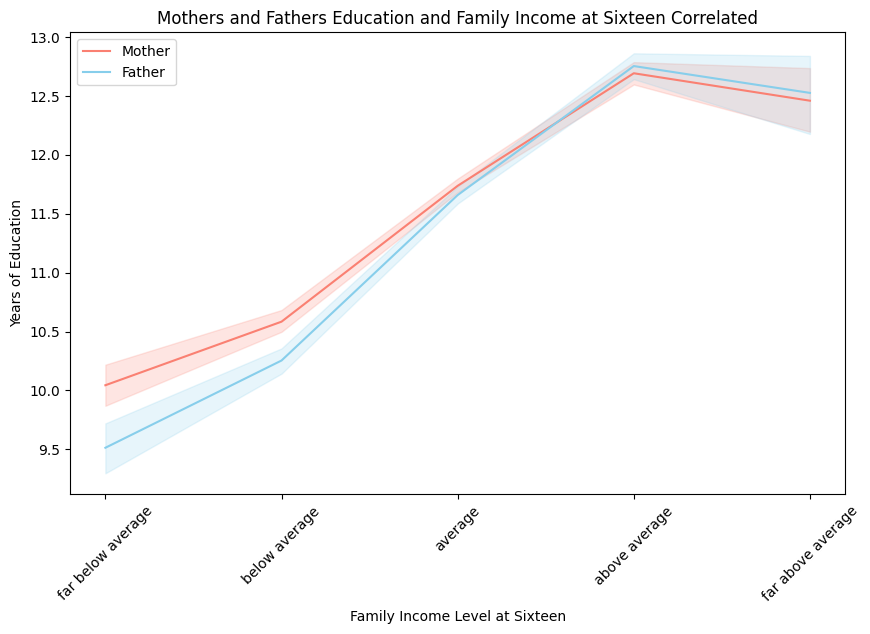

In [14]:
#plotting both mother and fathers education level and family income level at sixteen
plt.figure(figsize=(10,6))
sns.lineplot(data=gss, x=sorted_incom16, y='maeduc', color = 'salmon', label='Mother')
sns.lineplot(data=gss, x=sorted_incom16, y='paeduc', color = 'skyblue', label='Father')
plt.xticks(rotation=45)
plt.title('Mothers and Fathers Education and Family Income at Sixteen Correlated')
plt.xlabel('Family Income Level at Sixteen')
plt.ylabel('Years of Education')
plt.legend()

**Findings:**

Based on the first graph (the set of histograms), we can see that the individual education level is grouped more greatly in the higher range than each of the mother and father's groupings. It looks as if the individual generally attended college/ had a higher level of education than their parents.

Based on the second graph of the individual's years of education and income level, it appears that a higher level of education was correlated with a higher income. This can be seen by the increasing positive slope, however, the range of y-values graphed is fairly minimal, and thus one must consider that the effect of the education level in income may not be quite as significant as the graph shows.

Based on the thrid graph showing the mother and father's education levels with the family income level, we can see that family income level increased a fair amount as the level of education increased. We can also see that the volume/frequency of people with that higher level of education and income decreases significantly, especially after the income level of 10,000 - 14,999.

Based on the fourth graph showing the mother and father's education levels and the family's income level when the individual was 16, we can see that there was also an association between income and parents education level. The higher the level of education, the more likely the income level was to be far above average.